In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [494]:
df = pd.read_csv("Kenya_Schools.csv")

In [495]:
''' Extract Nairobi dataset'''
df = df.loc[df['County']=='NAIROBI']

In [496]:
df = df[['Total Enrolment', 'Total Number of Classrooms', 'Pupil Teacher Ratio']]

In [497]:
index = df[df['Total Enrolment'] == 0].index
df.drop(index, inplace=True)

In [498]:
''' Reset columns to use indexes'''
df.shape[1]
df.columns = range(df.shape[1])

In [499]:
df.head()

,0,1,2
21,743,16,35.4
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0
53,1207,24,44.7


In [500]:
x1 = df[0]
x2 = df[1]
y1 = df[2]

In [501]:
'''Scale the data, / normalize'''
def scaleData(X):
    xx = []
    mean = np.mean(X)
    std = np.std(X)
    for x in X:
        xx.append((x - mean) / std)
    return xx

In [503]:
x1 = scaleData(x1)

In [504]:
x2 = scaleData(x2)

In [505]:
y1 = scaleData(y1)

In [506]:
'''Scale the data'''
df = pd.DataFrame({"1":x1, "2":x2, "3":y1})
df = pd.concat([pd.Series(1, index=df.index, name='0'), df], axis=1)
df.head()

,0,1,2,3
0,1,1.020589,0.683267,0.981039
1,1,3.105056,1.679152,1.866472
2,1,-0.747465,-1.184018,-0.643364
3,1,-0.706404,-1.059532,-0.443642
4,1,2.141322,1.679152,1.600176


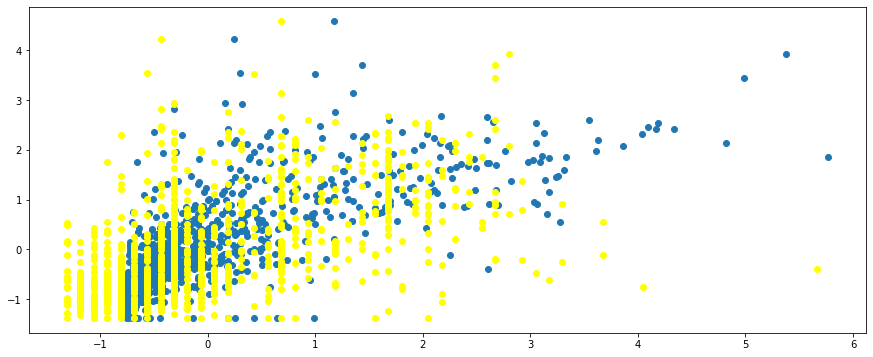

In [412]:
plt.figure(figsize=(15, 6))
plt.scatter(x1, y1)
plt.scatter(x2, y1, color='yellow')

In [508]:
X = df[["1","2"]]
y = df[["3"]]

In [509]:
XTrain  = X[:851]
XTest =  X[851:]
yTrain  = y[:851]
yTest =  y[851:]

In [510]:
theta = np.array([0]*len(X.columns))
theta

array([0, 0])

In [511]:
m = len(df)
m

1064

In [512]:
def hypothesis(theta, X):
    return theta*X

In [518]:
# def computeCost(X, y, theta):
#     y1 = hypothesis(theta, X)
#     y1=np.sum(y1, axis=1)
#     return sum(np.sqrt((y1-y)**2))/(2*47)
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))


In [537]:
# def gradientDescent(X, y, theta, alpha, i):
#     J = []  #cost function in each iterations
#     k = 0
#     while k < i:        
#         y1 = hypothesis(theta, X)
#         y1 = np.sum(y1, axis=1)
#         for c in range(0, len(X.columns)):
#             theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
#         j = computeCost(X, y, theta)
#         J.append(j)
#         k += 1
#     return J, j, theta


def gradientDescent(X,y,theta,iters,alpha):
    Cost = []
    cost = np.zeros(iters)
    X.reshape(-1,1)
    y.reshape(-1,1)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
        Cost.append(cost[i])
    
    return Cost, cost, theta

In [538]:
J, j, theta = gradientDescent(XTrain, yTrain, theta, 10000, 0.001)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [526]:
J

[97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,
 97038.02127659574,


In [527]:
j

97038.02127659574

In [528]:
theta

array([0, 0])

In [531]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
len(y_hat)

1064

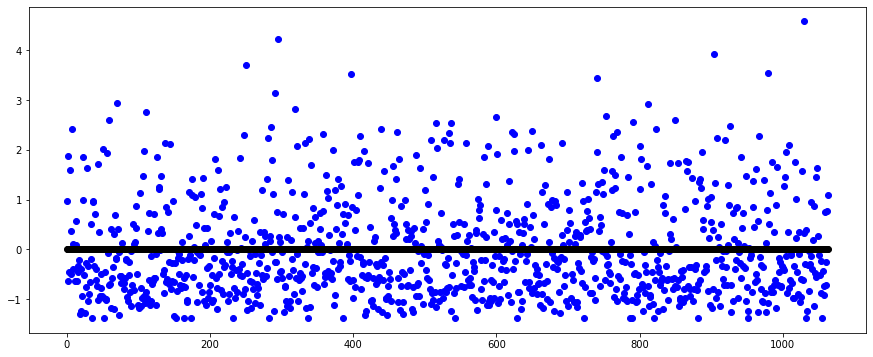

In [534]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.scatter(x=list(range(0, 1064)),y= y1, color='blue')         
plt.scatter(x=list(range(0, 1064)), y=y_hat, color='black')
plt.show()